# For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

# Read the data as an appropriate Time Series data and plot the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import os
os.chdir
os.getcwd()

'C:\\Users\\DELL14\\My first codes\\Time Series\\Assignment'

## Read the data as a monthly Time Series from the '.csv' file.

In [4]:
df_1 = pd.read_csv('Sparkling.csv', parse_dates=True,index_col='YearMonth')
df_1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [5]:
print(df_1.head())
print(df_1.tail())

            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
            Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


In [6]:
df_2 = pd.read_csv("Sparkling.csv")

In [7]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=192, freq='M')

In [8]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [9]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [10]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

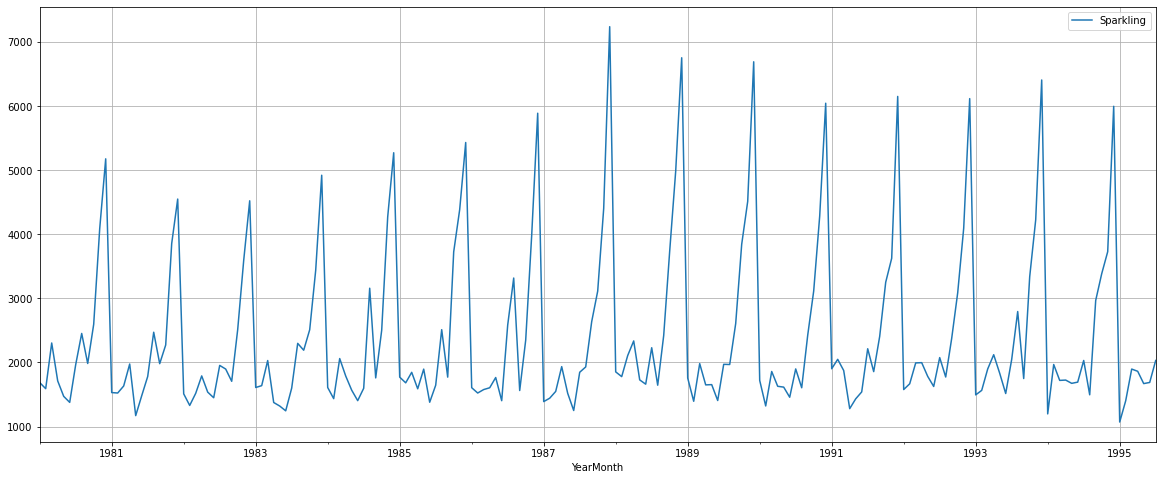

In [11]:
df_1.plot(figsize=(20,8))
plt.grid();

There seems to be a trend with a seasonality as well.

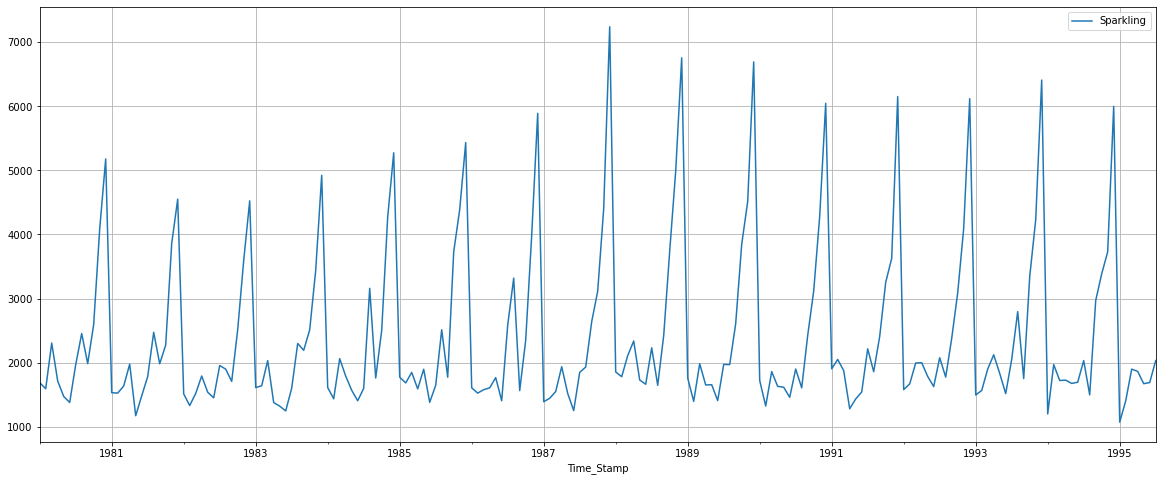

In [12]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

## Check the basic measures of descriptive statistics of the Time Series

In [13]:
round(df.describe(),3)

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

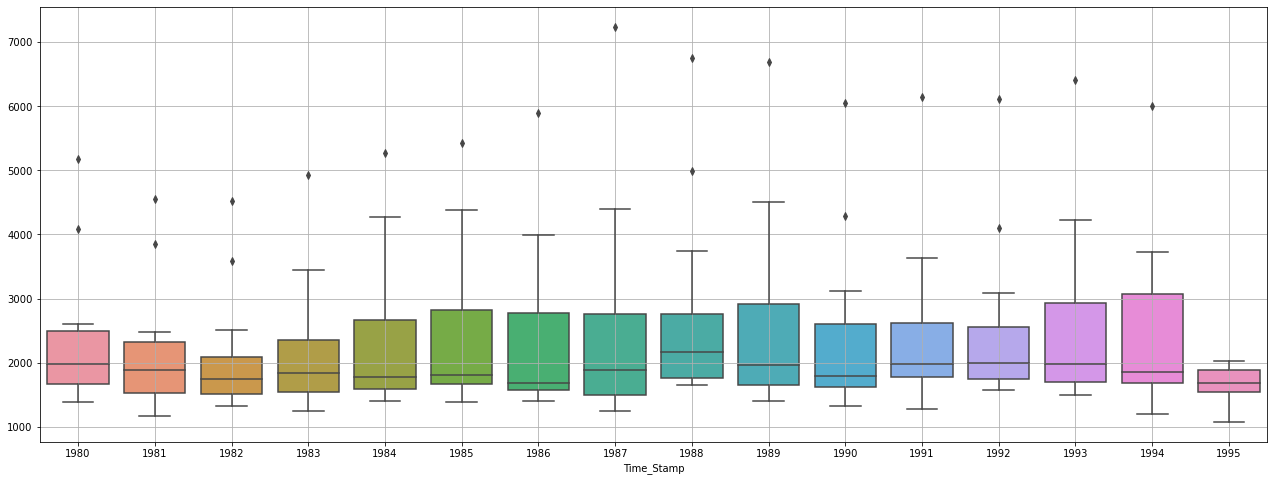

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

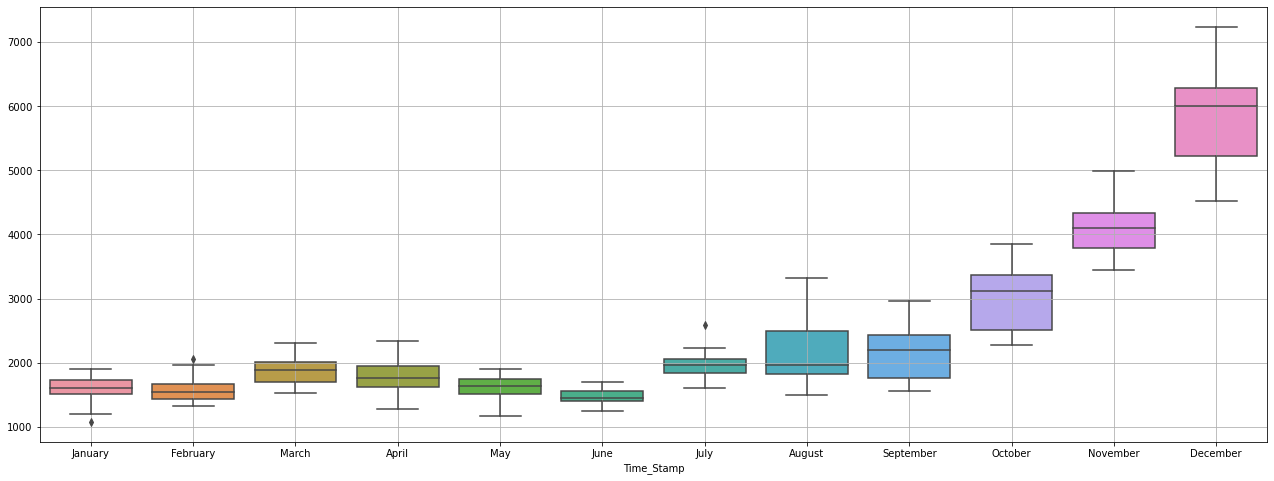

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

We see that there is maximum sales in the month of December.
Last quater of the year has the large number of sale.

## Plot a graph of monthly Rose sales across years.

In [16]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


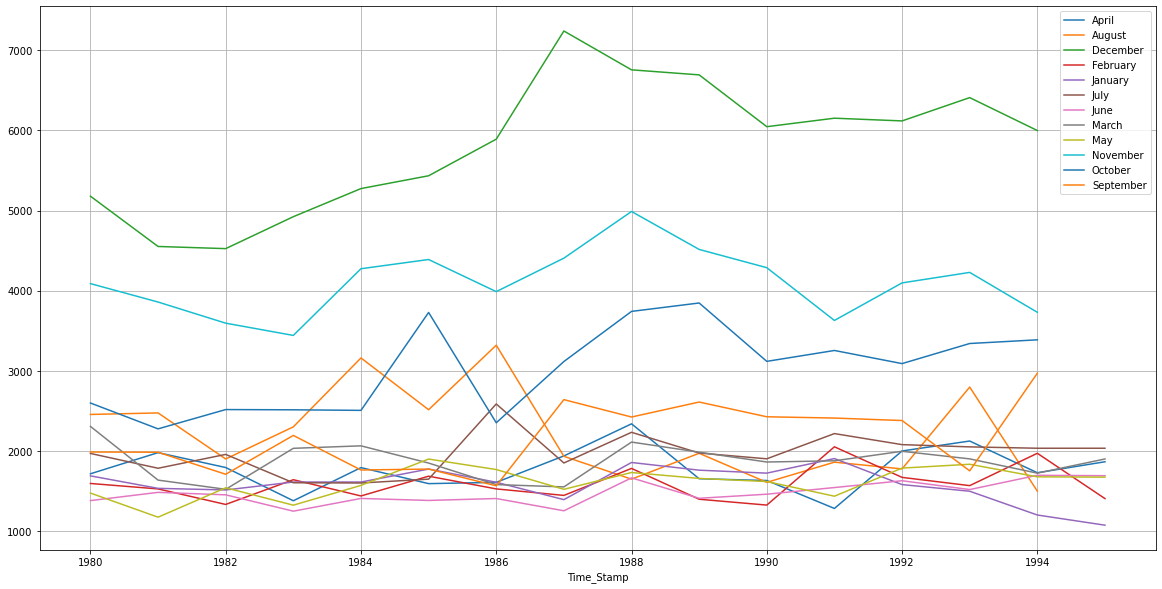

In [17]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

Interpolating missing data

In [18]:
df[df['Sparkling'].isna()]

,Sparkling
Time_Stamp,


In [20]:
df=df.interpolate(method ='linear', limit_direction ='forward')

In [22]:
df[df['Sparkling'].isna()]

,Sparkling
Time_Stamp,


## Split the data into train and test and plot the training and test data.

In [23]:
train=df[df.index.year <= 1991]
test=df[df.index.year  >= 1991]

In [24]:
print(train.shape)
print(test.shape)

(144, 1)
(55, 1)


In [25]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1991-08-31       1857
1991-09-30       2408
1991-10-31       3252
1991-11-30       3627
1991-12-31       6153 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



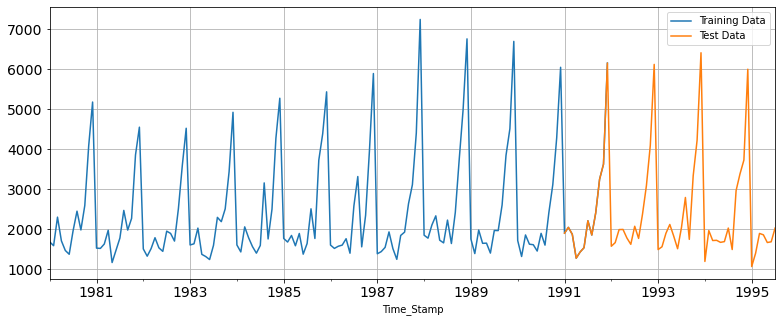

In [26]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sparkling Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [27]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [28]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [29]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1991-08-31       1857   140
1991-09-30       2408   141
1991-10-31       3252   142
1991-11-30       3627   143
1991-12-31       6153   144 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [34]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

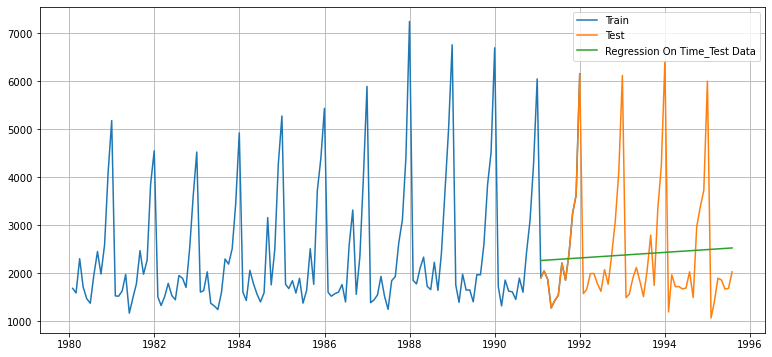

In [35]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [37]:
from sklearn import metrics

### Model Evaluation

In [38]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.058


In [39]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1275.058438


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$


In [41]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [42]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6153
1991-02-28    6153
1991-03-31    6153
1991-04-30    6153
1991-05-31    6153
Name: naive, dtype: int64

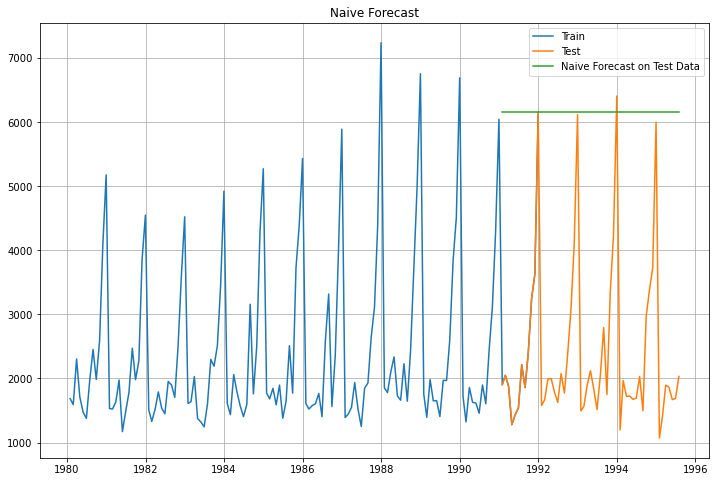

In [43]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [44]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3964.497


In [45]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1275.058438
NaiveModel,3964.496951


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [46]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [47]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2408.930556
1991-02-28,2049,2408.930556
1991-03-31,1874,2408.930556
1991-04-30,1279,2408.930556
1991-05-31,1432,2408.930556


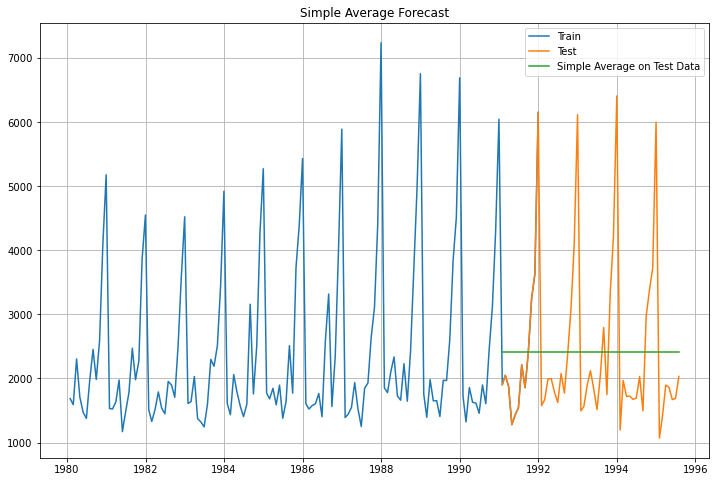

In [48]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [49]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.111


In [50]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1275.058438
NaiveModel,3964.496951
SimpleAverageModel,1275.110926


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [52]:
MovingAverage[MovingAverage['Sparkling'].isna()]

,Sparkling
Time_Stamp,


#### Trailing moving averages

In [53]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


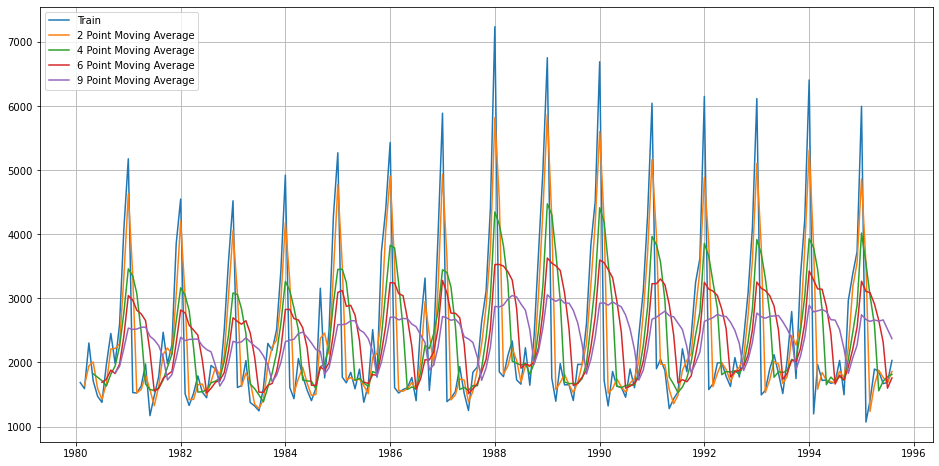

In [54]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [55]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year <= 1991] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year  >= 1991]

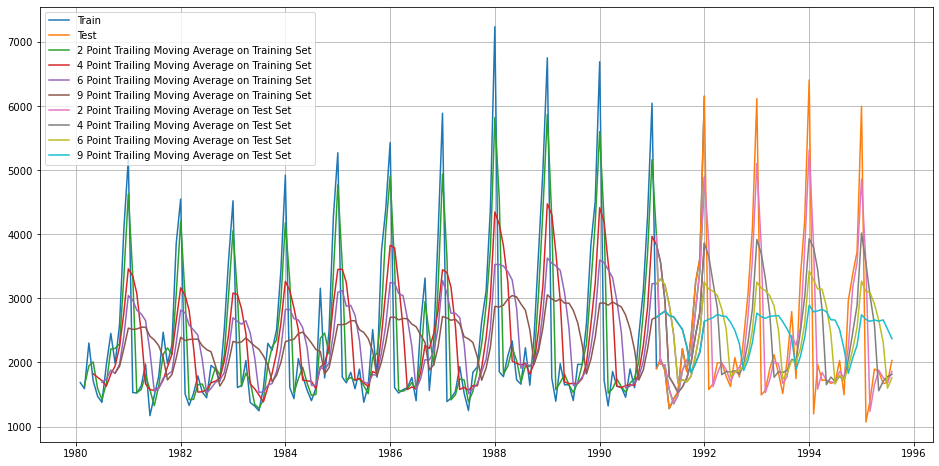

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [57]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,1275.058438
NaiveModel,3964.496951
SimpleAverageModel,1275.110926
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

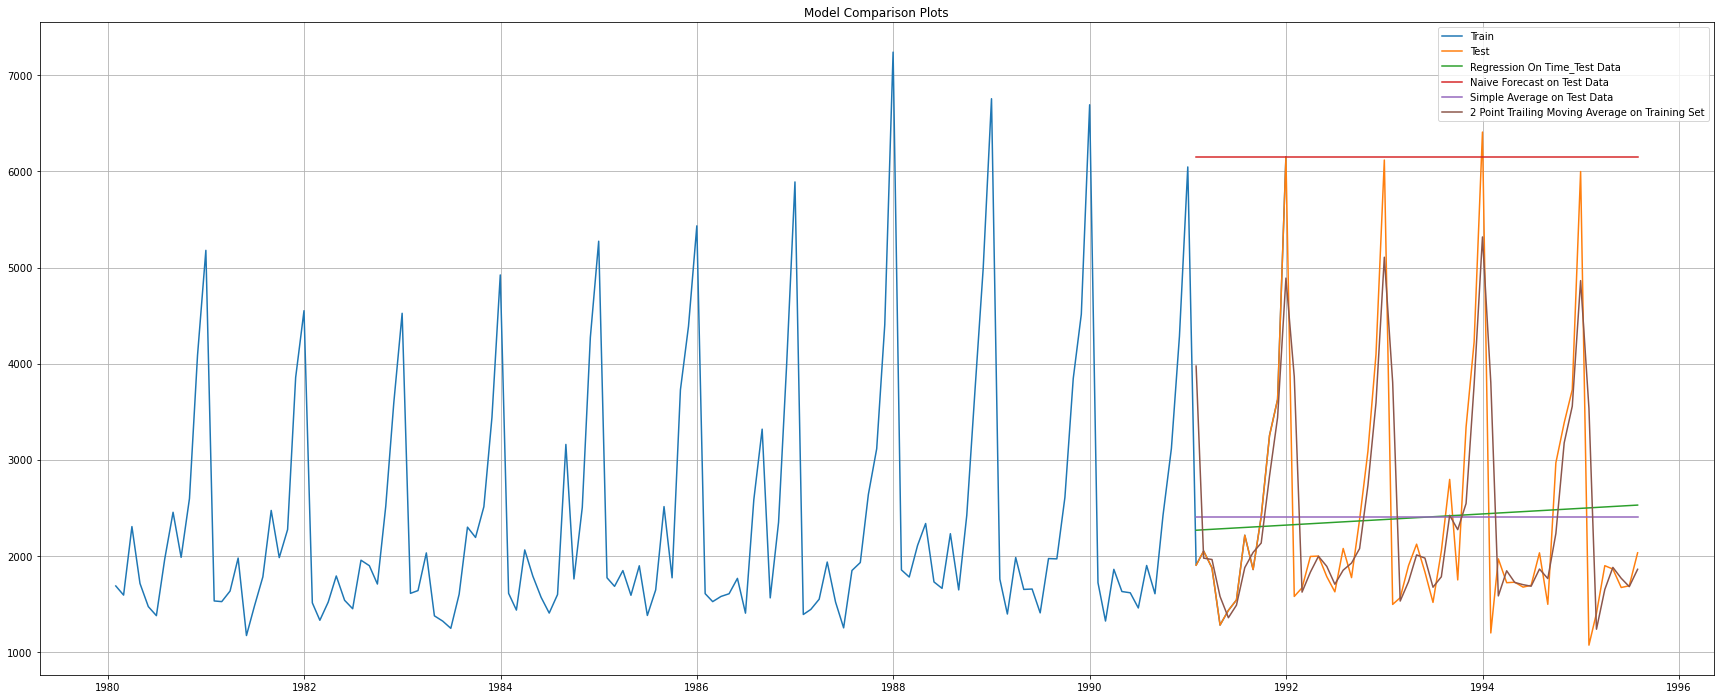

In [59]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [61]:
SES_train = train.copy()
SES_test = test.copy()

In [62]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [63]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [64]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2408.925642461129,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
# Replacing infinite with nan
SES_train.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
SES_train.dropna(inplace=True)
  
# Printing df
SES_train

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1991-08-31,1857
1991-09-30,2408
1991-10-31,3252


In [77]:
# Replacing infinite with nan
SES_test.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
SES_test.dropna(inplace=True)
  
# Printing df
SES_test

,Sparkling,predict,Rose,"(predict, 0.3)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6000000000000001)","(predict, 0.7000000000000002)","(predict, 0.8000000000000003)","(predict, 0.9000000000000001)"
Time_Stamp,,,,,,,,,,
1992-01-31,1577,2408.925642,1577,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-02-29,1667,2408.925642,1667,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-03-31,1993,2408.925642,1993,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-04-30,1997,2408.925642,1997,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-05-31,1783,2408.925642,1783,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-06-30,1625,2408.925642,1625,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-07-31,2076,2408.925642,2076,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-08-31,1773,2408.925642,1773,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784
1992-09-30,2377,2408.925642,2377,3795.337234,4251.208659,4657.450405,5015.317833,5334.555743,5625.236065,5895.753784


In [67]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,NaN
1991-02-28,2049,NaN
1991-03-31,1874,NaN
1991-04-30,1279,NaN
1991-05-31,1432,NaN


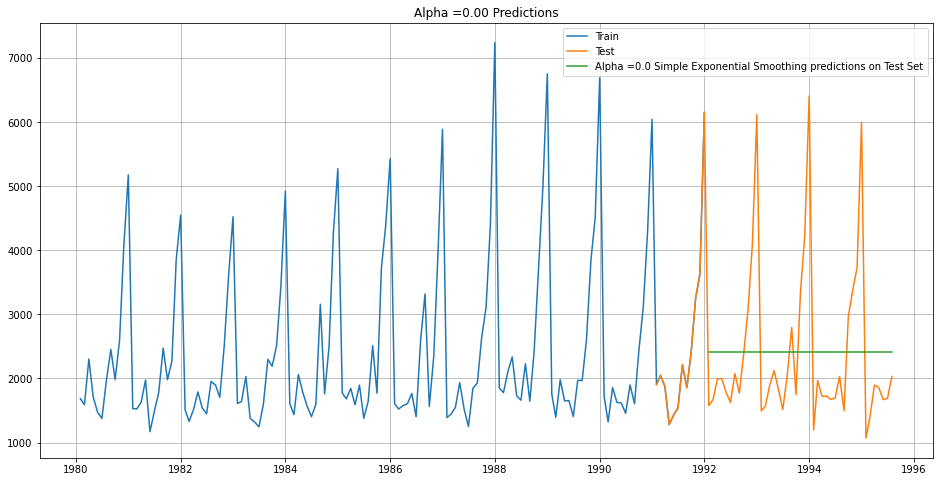

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.00 Predictions');

### Model Evaluation for $\alpha$ = 0.0 : Simple Exponential Smoothing

In [69]:
## Test Data
SES_test['predict']=SES_test['predict'].fillna(SES_test['predict'].mean())

In [70]:
## Test Data
SES_test['Rose']=SES_test['Sparkling'].fillna(SES_test['Sparkling'].mean())

In [71]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.0 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.111


In [72]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,1275.058438
NaiveModel,3964.496951
SimpleAverageModel,1275.110926
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.0,SimpleExponentialSmoothing",1275.110888


In [94]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    resultsDf= resultsDf.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i
                                  ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [95]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Alpha Values,Train RMSE
3,813.400684,NaN,NaN
4,1156.589694,NaN,NaN
0,1275.058438,NaN,NaN
7,1275.110888,NaN,NaN
2,1275.110926,NaN,NaN
5,1283.927428,NaN,NaN
6,1346.278315,NaN,NaN
8,1907.263799,0.3,1362.731346
9,2291.214265,0.4,1356.208919
10,2652.621570,0.5,1347.944758


In [96]:
## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [97]:
DES_train = train.copy()
DES_test = test.copy()

In [98]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [99]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [100]:
model_DES_autofit.params

{'smoothing_level': 0.6396535804704815,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0759913469717,
 'initial_slope': 24.139862594934442,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,NaN
1991-02-28,2049,NaN
1991-03-31,1874,NaN
1991-04-30,1279,NaN
1991-05-31,1432,NaN


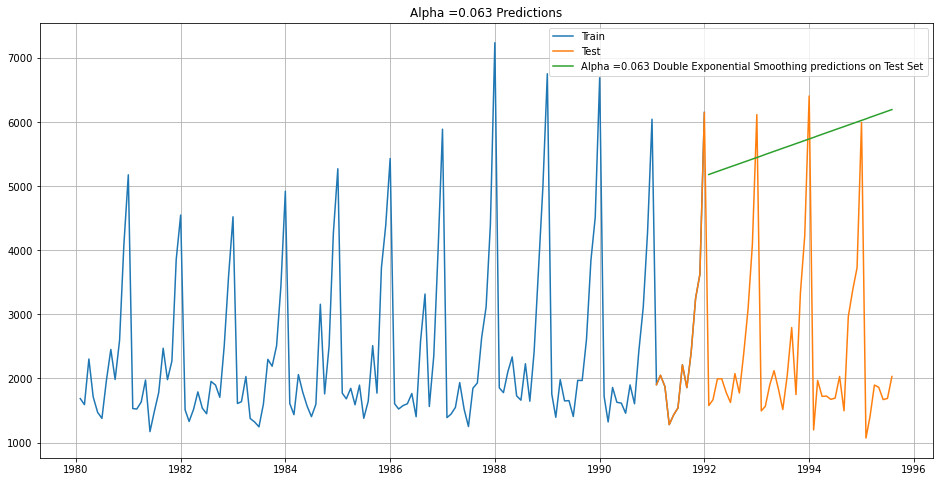

In [103]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.063 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.063 Predictions');

In [104]:
## Test Data
DES_test['predict']=DES_test['predict'].fillna(DES_test['predict'].mean())

In [106]:
## Test Data
SES_test['Sparkling']=SES_test['Sparkling'].fillna(SES_test['Sparkling'].mean())

In [108]:
## Test Data
rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.063 double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha =0.063 double Exponential Smoothing Model forecast on the Test Data, RMSE is 3537.669


In [109]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.063,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE,Alpha Values,Train RMSE
0,1275.058438,NaN,NaN
1,3964.496951,NaN,NaN
2,1275.110926,NaN,NaN
3,813.400684,NaN,NaN
4,1156.589694,NaN,NaN
5,1283.927428,NaN,NaN
6,1346.278315,NaN,NaN
7,1275.110888,NaN,NaN
8,1907.263799,0.3,1362.731346
9,2291.214265,0.4,1356.208919


In [110]:
# Replacing infinite with nan
DES_train.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
DES_train.dropna(inplace=True)
  
# Printing df
DES_train

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1991-08-31,1857
1991-09-30,2408
1991-10-31,3252


In [116]:
# Replacing infinite with nan
DES_test.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
DES_test.dropna(inplace=True)
  
# Printing df
DES_test

,Sparkling,predict,"(predict, 0.3, 0.3)","(predict, 0.3, 0.4)","(predict, 0.3, 0.5)","(predict, 0.3, 0.6000000000000001)","(predict, 0.3, 0.7000000000000002)","(predict, 0.3, 0.8000000000000003)","(predict, 0.3, 0.9000000000000001)","(predict, 0.3, 1.0000000000000002)",...,"(predict, 0.9000000000000001, 0.9000000000000001)","(predict, 0.9000000000000001, 1.0000000000000002)","(predict, 1.0000000000000002, 0.3)","(predict, 1.0000000000000002, 0.4)","(predict, 1.0000000000000002, 0.5)","(predict, 1.0000000000000002, 0.6000000000000001)","(predict, 1.0000000000000002, 0.7000000000000002)","(predict, 1.0000000000000002, 0.8000000000000003)","(predict, 1.0000000000000002, 0.9000000000000001)","(predict, 1.0000000000000002, 1.0000000000000002)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1992-01-31,1577,5183.674565,4310.478003,4603.506349,4989.364557,5452.444028,5918.783062,6279.296420,6460.011908,6470.836372,...,8065.435210,8233.298196,7163.426900,7420.860894,7648.549595,7859.523250,8062.703266,8264.055741,8468.215941,8679.0
1992-02-29,1667,5207.814428,4805.442098,5311.698879,5929.098659,6612.798840,7241.870973,7669.390309,7824.532475,7759.697268,...,10176.760169,10514.861438,8173.853799,8688.721787,9144.099190,9566.046501,9972.406531,10375.111482,10783.431883,11205.0
1992-03-31,1993,5231.954291,5300.406193,6019.891409,6868.832761,7773.153652,8564.958883,9059.484198,9189.053042,9048.558165,...,12288.085129,12796.424679,9184.280699,9956.582681,10639.648786,11272.569751,11882.109797,12486.167223,13098.647824,13731.0
1992-04-30,1997,5256.094153,5795.370288,6728.083939,7808.566863,8933.508464,9888.046794,10449.578087,10553.573608,10337.419061,...,14399.410088,15077.987920,10194.707599,11224.443575,12135.198381,12979.093001,13791.813063,14597.222963,15413.863766,16257.0
1992-05-31,1783,5280.234016,6290.334383,7436.276469,8748.300966,10093.863277,11211.134704,11839.671977,11918.094175,11626.279958,...,16510.735047,17359.551162,11205.134499,12492.304468,13630.747976,14685.616252,15701.516328,16708.278704,17729.079707,18783.0
1992-06-30,1625,5304.373878,6785.298478,8144.468999,9688.035068,11254.218089,12534.222615,13229.765866,13282.614742,12915.140854,...,18622.060007,19641.114403,12215.561398,13760.165362,15126.297571,16392.139502,17611.219594,18819.334445,20044.295649,21309.0
1992-07-31,2076,5328.513741,7280.262573,8852.661529,10627.769170,12414.572901,13857.310526,14619.859755,14647.135309,14204.001751,...,20733.384966,21922.677645,13225.988298,15028.026256,16621.847166,18098.662752,19520.922860,20930.390186,22359.511590,23835.0
1992-08-31,1773,5352.653604,7775.226668,9560.854059,11567.503273,13574.927714,15180.398436,16009.953644,16011.655876,15492.862648,...,22844.709925,24204.240886,14236.415198,16295.887149,18117.396762,19805.186002,21430.626125,23041.445927,24674.727531,26361.0
1992-09-30,2377,5376.793466,8270.190764,10269.046589,12507.237375,14735.282526,16503.486347,17400.047534,17376.176443,16781.723544,...,24956.034884,26485.804127,15246.842097,17563.748043,19612.946357,21511.709253,23340.329391,25152.501668,26989.943473,28887.0


In [112]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)

In [114]:
rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)

In [117]:
rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)

In [122]:
resultsDf = resultsDf.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [120]:
resultsDf

,Test RMSE,Alpha Values,Train RMSE,Beta Values
0,1275.058438,NaN,NaN,NaN
1,3964.496951,NaN,NaN,NaN
2,1275.110926,NaN,NaN,NaN
3,813.400684,NaN,NaN,NaN
4,1156.589694,NaN,NaN,NaN
5,1283.927428,NaN,NaN,NaN
6,1346.278315,NaN,NaN,NaN
7,1275.110888,NaN,NaN,NaN
8,1907.263799,0.3,1362.731346,NaN
9,2291.214265,0.4,1356.208919,NaN


In [123]:
resultsDf.sort_values(by=['Test RMSE']).head()

,Test RMSE,Alpha Values,Train RMSE,Beta Values
3,813.400684,NaN,NaN,NaN
4,1156.589694,NaN,NaN,NaN
0,1275.058438,NaN,NaN,NaN
7,1275.110888,NaN,NaN,NaN
2,1275.110926,NaN,NaN,NaN


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [127]:
TES_train = train.copy()
TES_test = test.copy()

In [128]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [129]:
model_TES_autofit = model_TES.fit()

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [130]:
model_TES_autofit.params

{'smoothing_level': 0.07429175275403677,
 'smoothing_slope': 0.07429175228954446,
 'smoothing_seasonal': 0.33133096993558486,
 'damping_slope': nan,
 'initial_level': 1661.8336941719074,
 'initial_slope': 0.0070625825890310075,
 'initial_seasons': array([1.00354439, 0.96163473, 1.22770154, 1.11964905, 0.91862417,
        0.91486835, 1.20819487, 1.53265399, 1.25587907, 1.64041035,
        2.50534017, 3.18266832]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [131]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,NaN
1991-02-28,2049,NaN
1991-03-31,1874,NaN
1991-04-30,1279,NaN
1991-05-31,1432,NaN


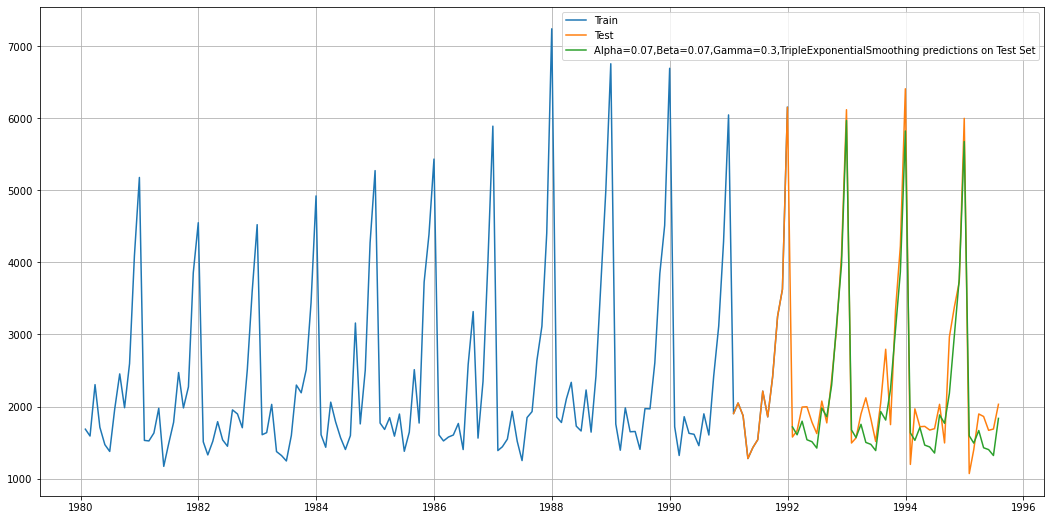

In [132]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.07,Beta=0.07,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [133]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.07,Beta=0.07,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Alpha Values,Train RMSE,Beta Values
0,1275.058438,NaN,NaN,NaN
1,3964.496951,NaN,NaN,NaN
2,1275.110926,NaN,NaN,NaN
3,813.400684,NaN,NaN,NaN
4,1156.589694,NaN,NaN,NaN
5,1283.927428,NaN,NaN,NaN
6,1346.278315,NaN,NaN,NaN
7,1275.110888,NaN,NaN,NaN
8,1907.263799,0.3,1362.731346,NaN
9,2291.214265,0.4,1356.208919,NaN


In [134]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [138]:
# Replacing infinite with nan
TES_train.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
TES_train.dropna(inplace=True)
  
# Printing df
TES_train

,Sparkling,"(predict, 0.3, 0.3, 0.3)"
Time_Stamp,,
1980-01-31,1686,1670.648004
1980-02-29,1591,1567.675984
1980-03-31,2304,2264.305180
1980-04-30,1712,1682.080826
1980-05-31,1471,1447.351398
...,...,...
1991-08-31,1857,2174.097576
1991-09-30,2408,2622.196316
1991-10-31,3252,3369.052144


In [139]:
# Replacing infinite with nan
TES_test.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
TES_test.dropna(inplace=True)
  
# Printing df
TES_test

,Sparkling,auto_predict,"(predict, 0.3, 0.3, 0.3)"
Time_Stamp,,,
1992-01-31,1577,1717.089447,1478.072538
1992-02-29,1667,1608.428380,1288.354001
1992-03-31,1993,1796.550098,1375.554362
1992-04-30,1997,1539.200434,1181.646689
1992-05-31,1783,1511.885739,1162.894861
1992-06-30,1625,1423.699595,1075.900849
1992-07-31,2076,1979.369214,1460.633434
1992-08-31,1773,1857.470394,1360.730572
1992-09-30,2377,2296.721662,1713.652075


In [143]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [144]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.3,0.3,0.3,411.450050,959.086956
1,0.3,0.3,0.4,409.632549,1181.138050
2,0.3,0.3,0.5,417.498677,1320.671061
3,0.3,0.3,0.6,440.680202,1476.268449
4,0.3,0.3,0.7,488.994972,1665.592563
...,...,...,...,...,...
507,1.0,1.0,0.6,139386.578821,12319.252005
508,1.0,1.0,0.7,90179.271665,244192.632314
509,1.0,1.0,0.8,98241.151258,531635.499584
510,1.0,1.0,0.9,79990.559387,24138.574690


In [145]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
128,0.5,0.3,0.3,467.205910,371.169694
137,0.5,0.4,0.4,551.423650,582.618792
72,0.4,0.4,0.3,482.623971,636.232924
193,0.6,0.3,0.4,522.186021,639.811110
360,0.8,0.8,0.3,766.575177,700.736090


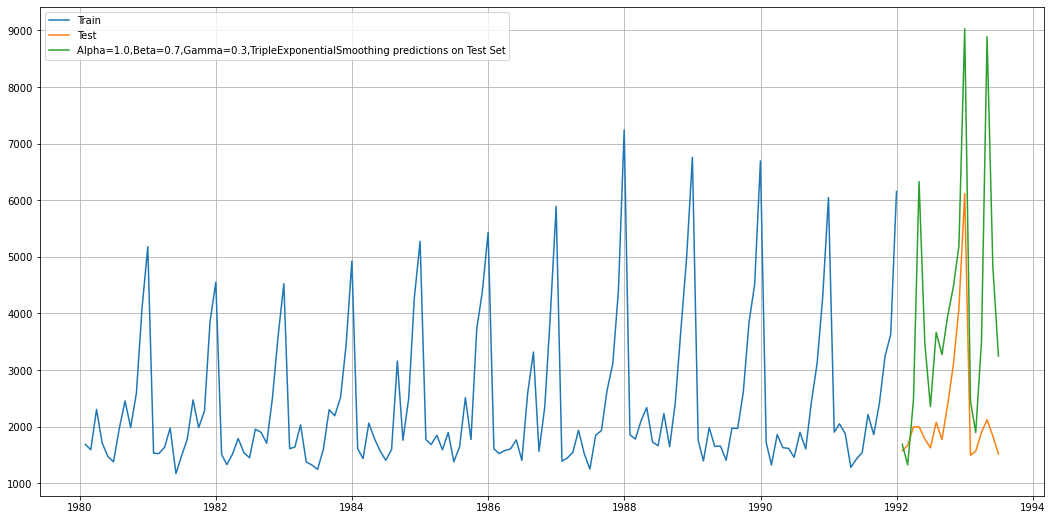

In [148]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [149]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Alpha Values,Train RMSE,Beta Values
0,1275.058438,NaN,NaN,NaN
1,3964.496951,NaN,NaN,NaN
2,1275.110926,NaN,NaN,NaN
3,813.400684,NaN,NaN,NaN
4,1156.589694,NaN,NaN,NaN
5,1283.927428,NaN,NaN,NaN
6,1346.278315,NaN,NaN,NaN
7,1275.110888,NaN,NaN,NaN
8,1907.263799,0.3,1362.731346,NaN
9,2291.214265,0.4,1356.208919,NaN


In [150]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Alpha Values,Train RMSE,Beta Values
"Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing",371.169694,NaN,NaN,NaN
3,813.400684,NaN,NaN,NaN
4,1156.589694,NaN,NaN,NaN
0,1275.058438,NaN,NaN,NaN
7,1275.110888,NaN,NaN,NaN
2,1275.110926,NaN,NaN,NaN
5,1283.927428,NaN,NaN,NaN
6,1346.278315,NaN,NaN,NaN
8,1907.263799,0.3,1362.731346,NaN
9,2291.214265,0.4,1356.208919,NaN


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 1.0, $\beta$ = 0.7 and $\gamma$ = 0.3.

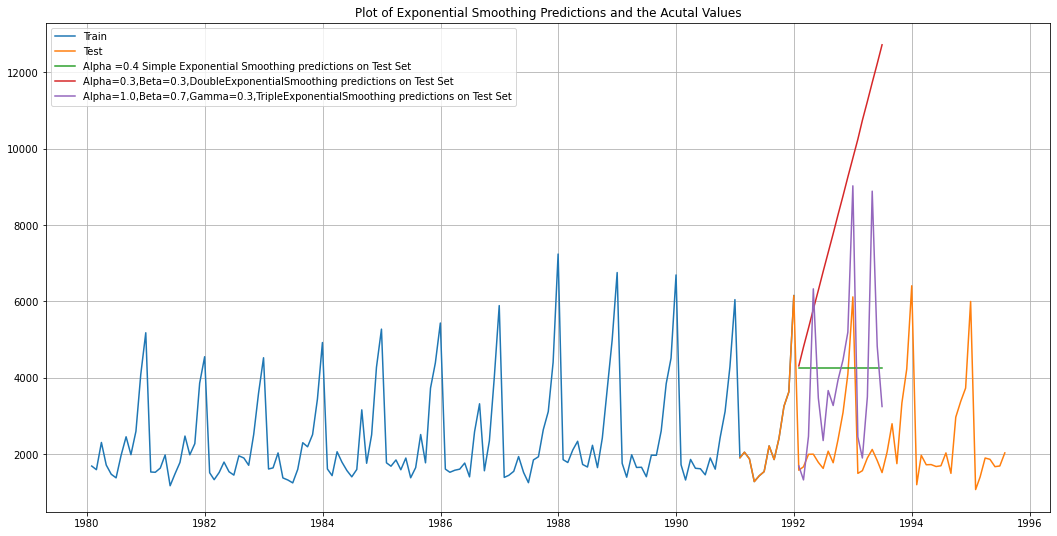

In [151]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The two models to be built on the whole data are the following:

* Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing
* Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing	

In [152]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.07429175275403677,
                                                                 smoothing_slope=0.07429175228954446,
                                                                 smoothing_seasonal=0.33133096993558486)

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [153]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 348.3299864194615


In [154]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

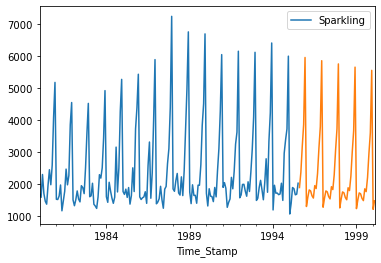

In [155]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [156]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1212.399819,1896.941565,2581.483312
1995-09-30,1690.184919,2374.726665,3059.268411
1995-10-31,2495.731544,3180.273290,3864.815036
1995-11-30,3179.915770,3864.457516,4548.999263
1995-12-31,5272.861490,5957.403236,6641.944982


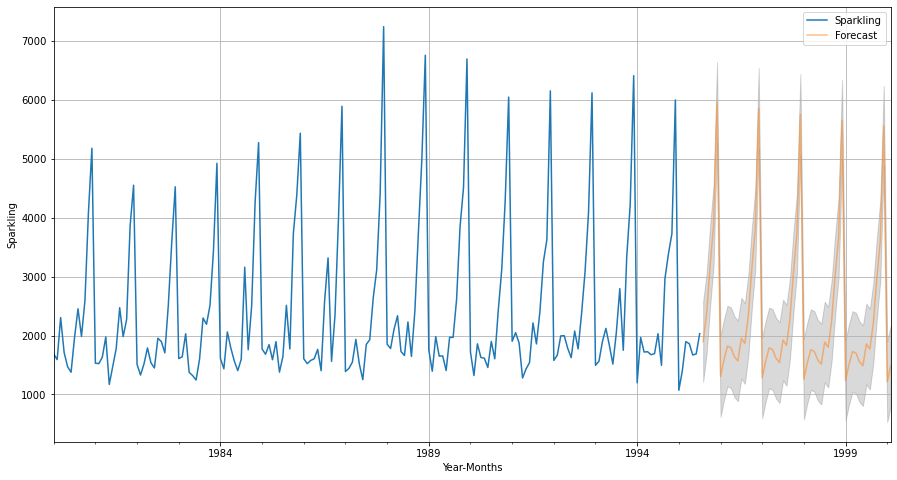

In [157]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [158]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.07429175275403677,
                                                                 smoothing_slope=0.07429175228954446,
                                                                 smoothing_seasonal=0.33133096993558486)

C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\DELL14\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [159]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 348.3299864194615


In [160]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

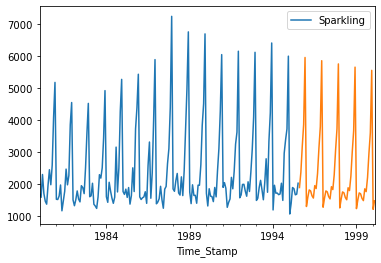

In [161]:
df.plot()
prediction_2.plot();

In [162]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1212.399819,1896.941565,2581.483312
1995-09-30,1690.184919,2374.726665,3059.268411
1995-10-31,2495.731544,3180.273290,3864.815036
1995-11-30,3179.915770,3864.457516,4548.999263
1995-12-31,5272.861490,5957.403236,6641.944982


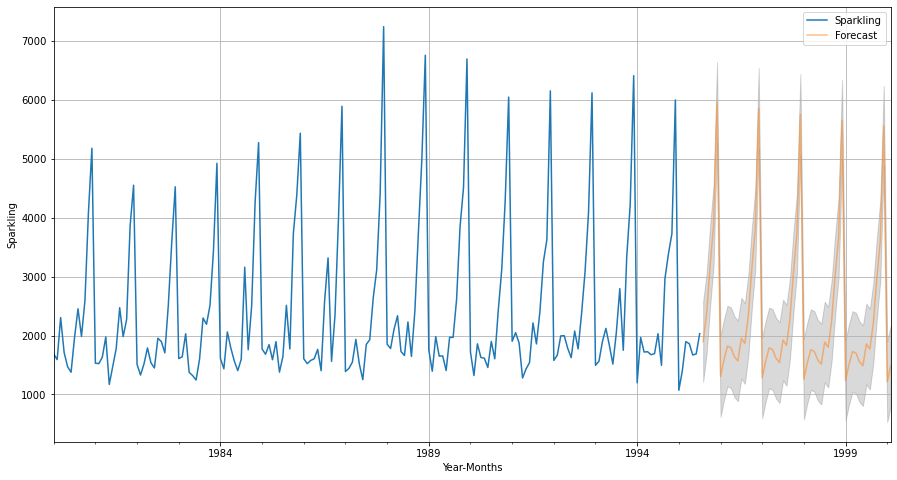

In [163]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

###### Note: Please do go ahead and build the remaining models on the full data and check how the confidence bands around the prediction look. 

# END